In [1]:
from VehicleDetection import VehicleDetection
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import statistics
from eval_utils import *
from video_utils import *
from load_utils import *
from background_remover import *

data_path = '../../AICity_data/train/S03/c010/'

In [2]:
means2, stds2 = get_background_stats(data_path + 'vdo.avi', 1, 535) # 535 is the 25% of the frames

100%|██████████| 534/534 [00:07<00:00, 70.08it/s]


In [3]:
gt_detect = readDetectionsXML('ai_challenge_s03_c010-full_annotation.xml')
gt_notParked = getNotParkedCars(gt_detect)

In [42]:
singleGaussianDetections = remove_background_adaptative(means2, stds2, data_path + 'vdo.avi', data_path + 'roi.jpg', 3.0, 2.0, 0.04)

100%|██████████| 2141/2141 [04:04<00:00,  8.76it/s]


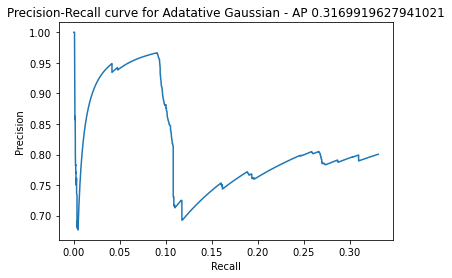

In [43]:
recs, precs, aps = ap_wo_conf(gt_notParked, singleGaussianDetections)
plot_prec_recall_curve(np.mean(precs, axis=0), recs[0], f'Precision-Recall curve for Adatative Gaussian - AP {np.mean(aps)}')

In [31]:
generate_videoBB_comparison(data_path + 'vdo.avi', gt_notParked, singleGaussianDetections, 'gaussDetector500-800_2', 536, 800)

 37%|███▋      | 801/2141 [00:07<00:12, 105.09it/s]


frames 234


In [11]:
gt_1000 = {}
for frame in range(530,1100):
    if str(frame) in gt_notParked and len(gt_notParked[str(frame)]) > 0:
        gt_1000[str(frame)] = gt_notParked[str(frame)]

In [51]:
# alphas = np.linspace(2.5, 5.0, num=6)
rhos = np.linspace(0.002, 0.06, num=6)
scores = {}
overAll_aps = {}
for id, alpha in enumerate([3.0, 3.5, 4.0, 4.5]):
    precs, recs, lables = [], [], []
    overAll_aps[id] = {'alpha':alpha, 'res':[]}
    for r in [0.005, 0.01, 0.04, 0.1]:
        singleGaussianDetections = remove_background_adaptative2(means2,stds2, data_path + 'vdo.avi',data_path + 'roi.jpg',alpha,2.0,r)
        rec, prec, ap,  tp_gauss, IoU_tp, IoU = voc_eval(gt_notParked,singleGaussianDetections)
        overAll_aps[id]['res'].append((r, ap))
        print(f'With Alpha {alpha:.3f} rho {r:.4f} the AP is {ap:.4f}')
        lables.append(f'Alpha {alpha:.3f} Rho {r:.3f}')
        precs.append(prec)
        recs.append(rec)
    scores[id] = [alpha, precs, recs, lables]

100%|██████████| 2141/2141 [04:02<00:00,  8.82it/s]


With Alpha 3.000 rho 0.0050 the AP is 0.3273


100%|██████████| 2141/2141 [04:06<00:00,  8.68it/s]


With Alpha 3.000 rho 0.0100 the AP is 0.3262


100%|██████████| 2141/2141 [03:59<00:00,  8.95it/s]


With Alpha 3.000 rho 0.0400 the AP is 0.3170


100%|██████████| 2141/2141 [03:51<00:00,  9.26it/s]


With Alpha 3.000 rho 0.1000 the AP is 0.2852


100%|██████████| 2141/2141 [03:34<00:00, 10.00it/s]


With Alpha 3.500 rho 0.0050 the AP is 0.3333


100%|██████████| 2141/2141 [03:34<00:00,  9.97it/s]


With Alpha 3.500 rho 0.0100 the AP is 0.3353


100%|██████████| 2141/2141 [03:34<00:00,  9.99it/s]


With Alpha 3.500 rho 0.0400 the AP is 0.3190


100%|██████████| 2141/2141 [03:28<00:00, 10.27it/s]


With Alpha 3.500 rho 0.1000 the AP is 0.2309


100%|██████████| 2141/2141 [03:27<00:00, 10.32it/s]


With Alpha 4.000 rho 0.0050 the AP is 0.2494


100%|██████████| 2141/2141 [03:35<00:00,  9.94it/s]


With Alpha 4.000 rho 0.0100 the AP is 0.2452


100%|██████████| 2141/2141 [03:35<00:00,  9.92it/s]


With Alpha 4.000 rho 0.0400 the AP is 0.2369


100%|██████████| 2141/2141 [03:35<00:00,  9.92it/s]


With Alpha 4.000 rho 0.1000 the AP is 0.2279


100%|██████████| 2141/2141 [03:34<00:00,  9.99it/s]


With Alpha 4.500 rho 0.0050 the AP is 0.2555


100%|██████████| 2141/2141 [03:33<00:00, 10.01it/s]


With Alpha 4.500 rho 0.0100 the AP is 0.2458


100%|██████████| 2141/2141 [03:34<00:00,  9.96it/s]


With Alpha 4.500 rho 0.0400 the AP is 0.2290


100%|██████████| 2141/2141 [03:26<00:00, 10.35it/s]

With Alpha 4.500 rho 0.1000 the AP is 0.1551


In [52]:
import json
print(overAll_aps)
with open('overAll_aps3.json', 'w') as outfile:
    json.dump(overAll_aps, outfile)

{0: {'alpha': 3.0, 'res': [(0.005, 0.32726000639490493), (0.01, 0.32621274806029665), (0.04, 0.3170015892991239), (0.1, 0.28521452839393646)]}, 1: {'alpha': 3.5, 'res': [(0.005, 0.3332798943170925), (0.01, 0.33534672738531557), (0.04, 0.3189877498388136), (0.1, 0.2308605341246291)]}, 2: {'alpha': 4.0, 'res': [(0.005, 0.24944334881353775), (0.01, 0.24520334372759556), (0.04, 0.23694375868400158), (0.1, 0.22786485545106236)]}, 3: {'alpha': 4.5, 'res': [(0.005, 0.25550964187327824), (0.01, 0.24575377291876777), (0.04, 0.22898677060708045), (0.1, 0.15514608571719435)]}}


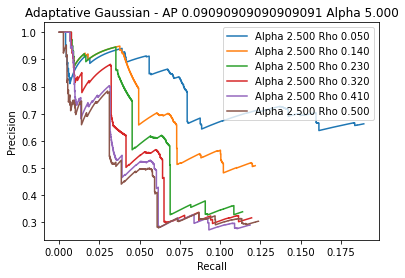

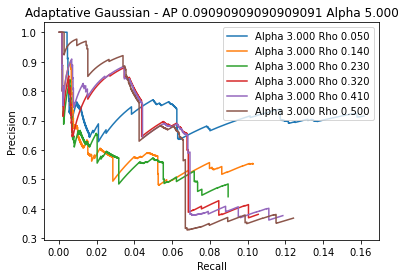

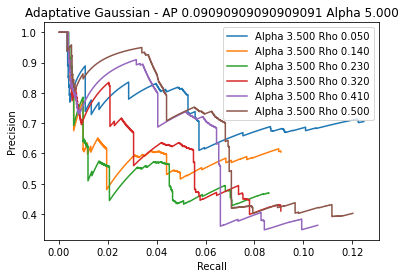

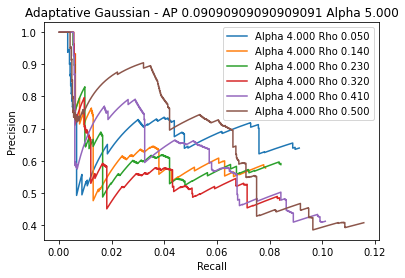

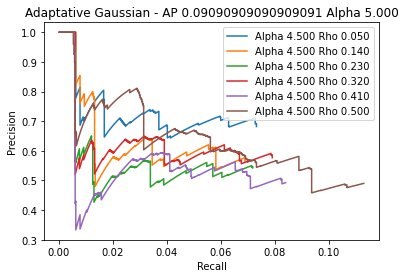

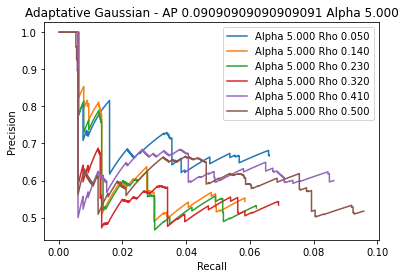

In [15]:
for id, values in scores.items():
    plot_multiple_prec_recall_curves(values[1], values[2], values[3], f'Adaptative Gaussian - AP {ap} Alpha {alpha:.3f}')

In [4]:
maxH, maxW = 0,0
minH, minW = 1900, 1900
for frame, objs in gt_notParked.items():
    for ob in objs:
        if ob.w > maxW:
            maxW = ob.w
        if ob.h > maxH:
            maxH = ob.h
        if ob.w < minW:
            minW = ob.w
        if ob.h < minH:
            minH = ob.h
print('Maximos: ',maxW, maxH)
print('Minimos: ',minW, minH)

Maximos:  592.55 441.0400000000001
Minimos:  29.03 12.809999999999945


In [46]:
total_frames = 2141
initial_frame = 535

gt_acummulative = {}
acummulative_ap = []
for frame in range(initial_frame, total_frames):
    sframe = str(frame)
    if sframe in gt_notParked:
        gt_acummulative[sframe] = gt_notParked[sframe]

    recs, precs, aps = ap_wo_conf(gt_acummulative,singleGaussianDetections)
    acummulative_ap.append(np.mean(aps))

In [48]:
print(acummulative_ap)

[0.6363636363636365, 0.6363636363636365, 0.6181818181818184, 0.610508658008658, 0.595097200779019, 0.5754522497704315, 0.5631930823656127, 0.5517312797125632, 0.5430122979440641, 0.5399412052765924, 0.5291958551618644, 0.5259868740884786, 0.5271777214185958, 0.5928040201034853, 0.6013241568157003, 0.6074719242110549, 0.606830550401979, 0.6154512154512155, 0.6197478027023481, 0.6999863163656267, 0.7021671634376551, 0.7070391414141413, 0.7114616312377505, 0.7151515151515152, 0.7192611041926109, 0.7230462519936205, 0.7261219792865363, 0.729490022172949, 0.7316017316017316, 0.7336152219873151, 0.7355371900826446, 0.7373737373737371, 0.7391304347826085, 0.7408123791102514, 0.7424242424242423, 0.7439703153988867, 0.7454545454545453, 0.7468805704099823, 0.7482517482517483, 0.7495711835334476, 0.7508417508417509, 0.7520661157024794, 0.753246753246753, 0.7543859649122808, 0.7554858934169281, 0.756548536209553, 0.7575757575757577, 0.7585692995529062, 0.7595307917888564, 0.7604617604617605, 0.761

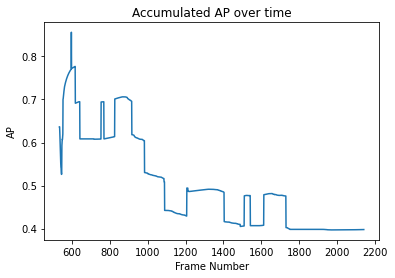

In [47]:
plot_prec_recall_curve(acummulative_ap,list(range(initial_frame,total_frames)), 'Accumulated AP over time','Frame Number', 'AP')